# $$\color{red}{\text{Artificial Intelligence - Camputer Assignment 5}}$$

$$\color{orange}{\text{Neural Network}}$$

$$\color{lime}{\text{Alireza Javid - 810099011}}$$

## $\color{deepskyblue}{\text{Import Libraries}}$

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

In [260]:
X_train = pd.read_csv("TrainImgs.csv",header=None)
Y_train = pd.read_csv("TrainLabels.csv",header=None)
X_test = pd.read_csv("TestImgs.csv",header=None)
Y_test = pd.read_csv("TestLabels.csv",header=None)

========== CLASS No. 1 ==========


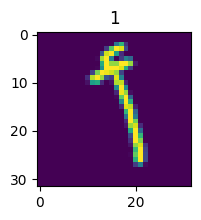

========== CLASS No. 2 ==========


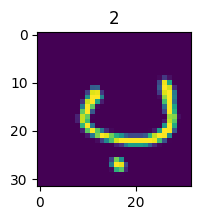

========== CLASS No. 3 ==========


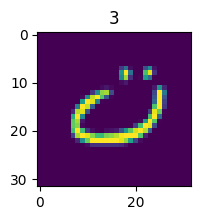

========== CLASS No. 4 ==========


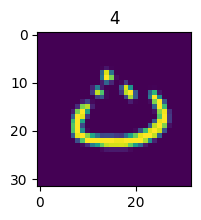

========== CLASS No. 5 ==========


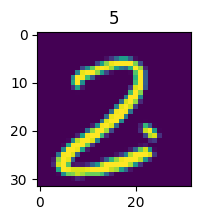

========== CLASS No. 6 ==========


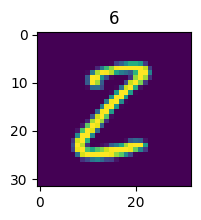

========== CLASS No. 7 ==========


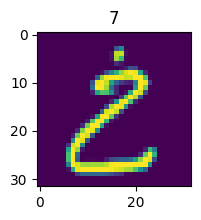

========== CLASS No. 8 ==========


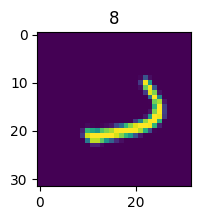

========== CLASS No. 9 ==========


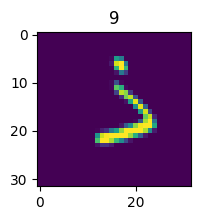

========== CLASS No. 10 ==========


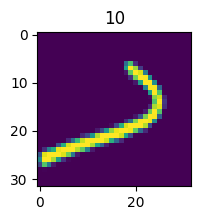

========== CLASS No. 11 ==========


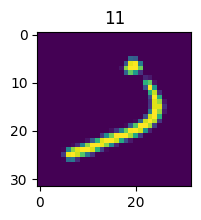

========== CLASS No. 12 ==========


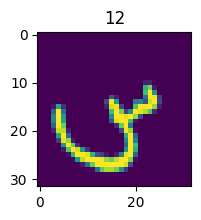

========== CLASS No. 13 ==========


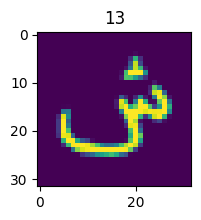

========== CLASS No. 14 ==========


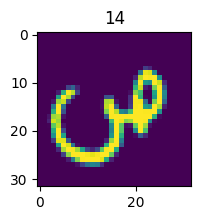

========== CLASS No. 15 ==========


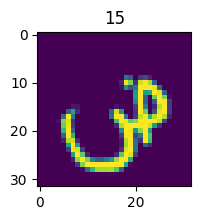

========== CLASS No. 16 ==========


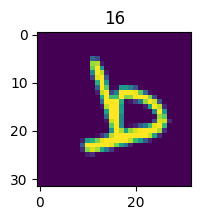

========== CLASS No. 17 ==========


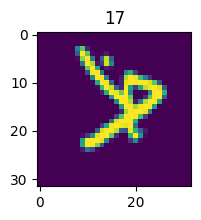

========== CLASS No. 18 ==========


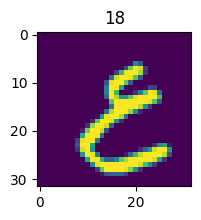

========== CLASS No. 19 ==========


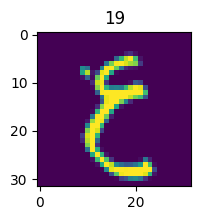

========== CLASS No. 20 ==========


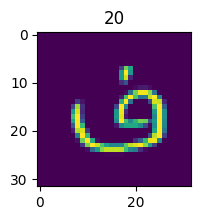

========== CLASS No. 21 ==========


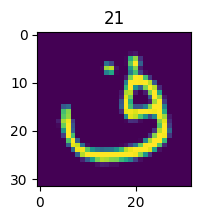

========== CLASS No. 22 ==========


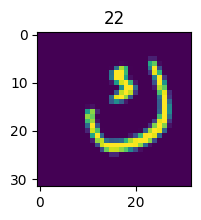

========== CLASS No. 23 ==========


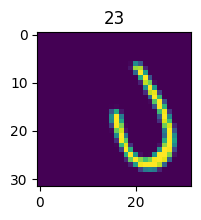

========== CLASS No. 24 ==========


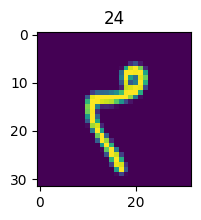

========== CLASS No. 25 ==========


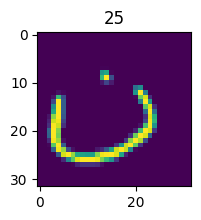

========== CLASS No. 26 ==========


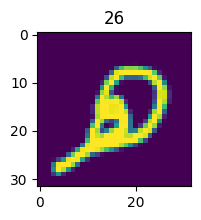

========== CLASS No. 27 ==========


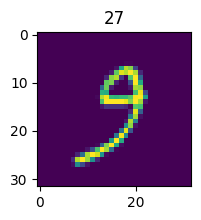

========== CLASS No. 28 ==========


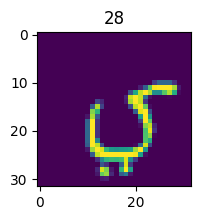


Minimum value in image: 0
Maximum value in image: 255


In [261]:
for i in range(1,29):
    index = 0
    index = Y_train[Y_train[0] == i].index[0]
    image =  X_train.iloc[index].to_numpy()
    print("========== CLASS No.",str(i),"==========")
    plt.figure(figsize = (2 , 2))
    plt.imshow(image.reshape(32,32).T)
    plt.title(i)
    plt.show()
print("\nMinimum value in image: " + str(np.amin(image)))
print("Maximum value in image: " + str(np.amax(image)))

In [262]:
print(len(X_train))
print(len(X_test))
print(len(Y_train[0].unique()))
print(len(Y_test[0].unique()))

13440
3360
28
28


In [263]:
y_train = pd.DataFrame()
x_train = pd.DataFrame()
y_test = pd.DataFrame()
x_test = pd.DataFrame()
for i in range(1,17):
  indexes_train = Y_train.index[Y_train[0] == i]
  indexes_test = Y_test.index[Y_test[0] == i]
  y_train = y_train.append(Y_train.iloc[indexes_train])
  x_train = x_train.append(X_train.iloc[indexes_train])
  y_test = y_test.append(Y_test.iloc[indexes_test])
  x_test = x_test.append(X_test.iloc[indexes_test])

C:\Users\hooshmand\AppData\Local\Temp\ipykernel_18748\2882907948.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(Y_train.iloc[indexes_train])
C:\Users\hooshmand\AppData\Local\Temp\ipykernel_18748\2882907948.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_train = x_train.append(X_train.iloc[indexes_train])
C:\Users\hooshmand\AppData\Local\Temp\ipykernel_18748\2882907948.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_test = y_test.append(Y_test.iloc[indexes_test])
C:\Users\hooshmand\AppData\Local\Temp\ipykernel_18748\2882907948.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_test = x_test.

In [264]:
y_train.value_counts()

1     480
2     480
3     480
4     480
5     480
6     480
7     480
8     480
9     480
10    480
11    480
12    480
13    480
14    480
15    480
16    480
dtype: int64

<BarContainer object of 16 artists>

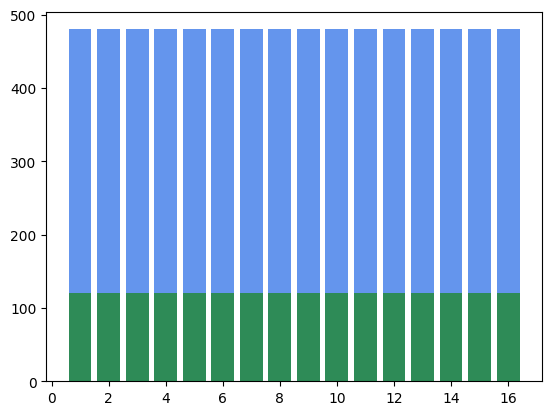

In [265]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(y_train, bins=list(np.arange(1,18)))
b_heights, b_bins = np.histogram(y_test, bins=list(np.arange(1,18)))

ax.bar(a_bins[:-1], a_heights, facecolor='cornflowerblue')
ax.bar(b_bins[:-1], b_heights, facecolor='seagreen')

In [266]:
x_train = x_train/255
x_test = x_test/255

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy().reshape(-1)
y_test = y_test.to_numpy().reshape(-1)

In [267]:
class Dataloader:
    '''
    This class prepares the dataset for the neural network.
    '''
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):
        '''
        This is the constructor. It gets dataset information and initializes the 
        Dataloader class fields.
            Parameters:
                data: features your dataset in pandas.Dataframe format.
                labels: labels of your dataset in pandas.Dataframe format.
                n_classes: number of classes you have in your dataset.
                batch_size: the number of samples that will be propagated through the network.
                shuffle: boolean value indicating whether or not the dataset should be shuffled
        '''

        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        '''
        This private method gets labels and provides one_hot vectors of labels.
        For categorical variables where no such ordinal relationship exists,
        the integer encoding is not enough.
        In this case, a one-hot encoding can be applied to the integer representation.
        This is where the integer encoded variable is removed, and a new binary variable is
        added for each unique integer value.
        example:
            red,    green,    blue
            1,      0,        0
            0,      1,        0
            0,      0,        1
                Parameters:
                        label: lables of your dataset in pandas.Dataframe format.
                        n_classes: number of classes you have in your dataset.
                
                Returns:
                    onehot_vectors: onehot vectors of the labels
        '''
        onehot_vectors = np.eye(n_classes)[labels-1]
        return onehot_vectors
    
    def __shuffle_dataset(self):
        '''
        This private method shuffles your dataset.
        It uses data and onehot_labels to shuffle them
        symmetrical.
        '''
        indeces = np.arange(len(self.__data))
        np.random.shuffle(indeces)
        self.__data = self.__data[indeces]
        self.__onehot_labels = self.__onehot_labels[indeces]

    def __iter__(self):
        '''
        The __iter__() function returns an iterator for the
        given object (array, set, tuple, etc., or custom objects).
        This will return your dataset in the batch_size given. This should
        be used to provide data for the neural network.
        '''
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

In [268]:
class Identical:
    '''
    This is the Identical activation function. This activation function just
    return the value it gets.
    '''
    
    def __init__(self):
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        As this is an identical activity function, it just 
        returns np.matrix of the input.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_value: np.matrix of input with float datatypes
        '''
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        '''
        This method returns the derivation of the input.
        As the derivation of x is one, this method returns
        a matrix of one with the shape of the input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_derivative: np.matrix of ones with matrix shape
        '''
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _value method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)
    

class Relu:
    '''
    This is the Relu activation function. 
    The rectified linear activation function or ReLU for short
    is a piecewise linear function that will output the input directly
    if it is positive, otherwise, it will output zero.
    '''
    
    def __init__(self):
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set 0 in the matrix if the value is less than 0 else, it returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        # TODO: Implement
        relu_value = np.matrix(matrix, dtype=float)
        relu_value = np.maximum(0, relu_value)
        return relu_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_derivative: np.matrix of relu activation function derivation result
        '''
        # TODO: Implement
        relu_derivative = np.matrix(matrix, dtype=float)
        relu_derivative[relu_derivative <= 0] = 0.0
        relu_derivative[relu_derivative > 0] = 1.0
        return relu_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _relu method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __relu(matrix): __relu return value for the input matrix
        '''
        return self.__val(matrix)

    
class LeakyRelu:
    '''
    This is the Leaky Relu activation function. 
    Leaky Rectified Linear Unit, or Leaky ReLU,
    is a type of activation function based on a ReLU,
    but it has a small slope for negative values instead
    of a flat slope.
    '''
    
    def __init__(self, negative_slope=0.01):
        '''
        This is the constructor.
        It sets negative_slope field.
            Parameters:
                negative_slope: slope for negative input values
        '''
        self.negative_slope = negative_slope
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set negative_slope*value in the matrix if the value is less than 0, else it
        returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        # TODO: Implement
        leacky_relu_value = np.matrix(matrix, dtype=float)
        leacky_relu_value = np.maximum(self.negative_slope*leacky_relu_value, leacky_relu_value)        
        return leacky_relu_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of leaky relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                leacky_relu_derivative: np.matrix of leaky relu activation function derivation result
        '''
        # TODO: Implement
        leacky_relu_derivative = np.matrix(matrix, dtype=float)
        leacky_relu_derivative[leacky_relu_derivative > 0] = 1.0
        leacky_relu_derivative[leacky_relu_derivative <= 0] = self.negative_slope
        return leacky_relu_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

    
class Sigmoid:
    '''
    A sigmoid function is a mathematical function having a
    characteristic "S"-shaped curve or sigmoid curve.
    It return S(x)=1/(1+e^-x)
    '''
    
    def __init__(self): pass

    def __val(self, matrix):
        '''
        Returns 1/(1+e^-x) of values
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_value: np.matrix of relu activation function result
        '''
        # TODO: Implement
        sigmoid_value = np.matrix(matrix, dtype=float)
        sigmoid_value = 1/(1 + np.exp(-sigmoid_value))
        return sigmoid_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of sigmoid function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of sigmoid activation function derivation result
        '''
        # TODO: Implement
        sigmoid_derivative = np.matrix(matrix, dtype=float)
        sigmoid_derivative = np.divide(np.exp(-sigmoid_derivative), np.power(1 + np.exp(-sigmoid_derivative), 2))
        return sigmoid_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)





class Softmax:
    '''
    The softmax function, also known as softargmax  or normalized
    exponential function is a generalization of the logistic
    function to multiple dimensions. It is used in multinomial logistic
    regression and is often used as the last activation function of a neural
    network to normalize the output of a network to a probability distribution
    over predicted output classes, based on Luce's choice axiom.
    Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
    '''
        
    def __init__(self):
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass

    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the softmax on that.
        Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        # TODO: Implement
        temp = np.matrix(matrix, dtype=float)
        softmax_value = np.exp(temp - np.max(temp))
        softmax_value /= softmax_value.sum(axis=1)
        return softmax_value
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)
    
class Tanh:
    
    def __init__(self):
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass

    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It performs Tanh on the values.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                tanh_value: np.matrix of Tanh activation function result
        '''
        # TODO: Implement
        tanh_value = np.matrix(matrix, dtype=float)
        tanh_value = np.tanh(tanh_value)
        return tanh_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of Tanh function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of Tanh activation function derivation result
        '''
        # TODO: Implement
        tanh_derivative = np.matrix(matrix, dtype=float)
        tanh_derivative = np.power(np.divide(1, np.cosh(tanh_derivative)), 2)
        return tanh_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

In [269]:
class CrossEntropy: #(with softmax)
    '''
    Cross-entropy is a measure of the difference between two probability
    distributions for a given random variable or set of events. You might
    recall that information quantifies the number of bits required to encode
    and transmit an event.
    The above image can help you.
    '''
    
    def __init__(self): pass
        # '''
        # This is the constructor. It does not have any fields
        # as a result, there is no need to do anything in the constructor.
        # '''

    def __val(self, true_val, expected_val):
        '''
        L(y^, y) = - Σ (y^(k)log (y^)^(k)) for k in K
        Parameters:
            true_val: calculated values (generated by neural network)
            expected_val: real values in dataset
        Returns:
            cross_entropy_value: cross entropy of inputs
        '''
        assert np.shape(true_val)==np.shape(expected_val)
        softmax = Softmax()
        cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float),  np.log(softmax(true_val))), axis=1)
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        '''
        Returns derivation of cross entropy.
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                cross_entropy_derivative: cross entropy derivation of inputs
        '''
        assert np.shape(true_val)==np.shape(expected_val)
        softmax = Softmax()
        cross_entropy_derivative = softmax(true_val) - expected_val
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(true_val, expected_val)

In [270]:
class Layer:
    '''
    The layer class is used to define neural network layers.
    It stores all needed information for each layer, such as neurons count,
    weight matrix, bias, the output after applying the activation function, etc.
    '''

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, activation=Identical(), initial_weight='uniform', 
                 **initializing_parameters):
        '''
        Parameters:
            input_size: the size of the input of this layer.
            output_size: the size of the output after this layer.
            activation: the activation function. It can be initialized to either of the previously defined activation classes.
                               default is an Identical activation function.
            initial_weight: either normal or uniform. It defines the method for weight initialization.
        '''
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        '''
        It calculates the output of this layer for the layer_input argument.
        This method also stores __last_input, __last_activation_input, and __last_activation_derivative
        for future use in backpropagation.
        Parameters:
            layer_input: 2d np.matrix representing the input matrix of this layer.
        Returns:
            Final output of this layer after applying the activation function.
        '''
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)

        self.__last_input = layer_input
        self.__last_activation_input = np.add(np.dot(self.__last_input, self.__weight), self.__bias)
        self.__last_activation_output = self.__activation(self.__last_activation_input)
        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_output)
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        '''
        It updates Layer weights according to the backpropagation matrix and learning rate.
        This method updates bias values as well.
        Parameters:
            backprop_tensor: 2d np.matrix passed from the next layer containing gradient values.
            lr: learning rate
        Returns:
            backprop_tensor to be used by the previous layer.
        '''
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        inputT = self.__last_input.transpose()
        dy = np.multiply(backprop_tensor, self.__last_activation_derivative)
        dw = np.matmul(inputT, dy)
        backprop_tensor = np.matmul(dy, self.__weight.transpose())
        self.__weight -= dw * lr
        db = np.matmul(np.matrix(np.tile(1, (1, dy.shape[0]))), dy)
        self.__bias -= db * lr
        return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a uniform distribution between low and high values.
        It uses default low and high values unless low or high are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom low or high values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using uniformly distributed values.
        '''
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        weights = np.random.uniform(low=low, high=high, size=(dim1, dim2))
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a normal distribution with mean and var values.
        It uses default mean and variance values unless mean or var are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom mean or var values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using normaly distributed values.
        ''' 
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        weights = np.random.normal(loc=mean, scale=np.sqrt(var), size=(dim1,dim2))
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

In [271]:
class FeedForwardNN:
    '''
    This class is used in order to implement custom feed-forward neural networks.
    The FeedForwardNN class stores a list of layers that determines all network layers.
    It also consists of the learning rate and loss function.
    '''
    def __init__(self, input_shape):
        '''
        Parameters:
            input_shape: the size of the first input to our neural network.
        '''
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
        '''
         This method adds a new custom layer to the layers_list.
         Parameters:
             n_neurons: number of neurons in this layer
             activation: the activation function of this layer, default is Relu
             initial_weight: either a uniform or normal, default is uniform
             initializing_parameters: other initializing parameters such as low, high, mean, var, etc
        '''
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        '''
        This method is used to set training parameters.
        Parameters:
            loss: loss function, default is CrossEntropy
            lr: learning rate, default is 1e-3
        '''
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        '''
        This method calculates the output of the complete neural network for a passed input.
        Parameters:
            network_input: input of the neural network
        Returns:
            network_output: output of the neural network after forwarding the network_input
        '''
        assert type(self.__output_shape) != None, "Model is not compiled!"
        network_output = network_input
        for layer in self.__layers_list :
          network_output = layer.forward(network_output)
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        '''
        This method trains the neural network using specified parameters.
        It runs the __train private method epoch times and fills the log dictionary.
        Parameters:
            epochs: number of epochs to run
            trainloader: DataLoader for train data
            testloader: DataLoader for test data
            print_results: whether or not to print the results
        Returns:
            log: complete log of the training process as a dictionary consisting of
            train_accuracy, train_loss, test_accuracy, test_loss
        '''
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        '''
        Trains the neural network for one epoch.
        Parameters:
            trainloader: A DataLoader consisting of train data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        '''
        Test the neural network using a testloader.
        Parameters:
            testloader: A DataLoader of test data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        '''
        Trains the neural network for one batch of train data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''
        out = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(out,y_batch)
        batch_average_loss = self.__update_weights(out, y_batch)
        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        '''
        Tests the neural network for one batch of test data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''  
        out = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(out,y_batch)
        cross_entropy = CrossEntropy()
        batch_loss = cross_entropy(out, y_batch)
        batch_average_loss = np.sum(batch_loss)/len(out)        
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        '''
        Parameters:
            outputs: output of the neural network
        Returns:
            labels: labels generated from the outputs of the neural network
        '''
        labels = np.argmax(outputs, axis=1)
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        '''
        Computes accuracy by comparing output and expected_output.
        Parameters:
            output: actual output of the neural network
            expected_output: expected output
        Returns:
            accuracy
        '''
        accuracy = ((self.__get_labels(output) == self.__get_labels(expected_output)).sum()/len(output)) * 100
        return accuracy
    
    
    def __update_weights(self, output, y_train):
        '''
        Updates weights of all layers according to neural network output and labels.
        Parameters:
            output: output of the neural network
            y_train: y labels for one batch of train data
        Returns:
            None
        '''
        cross_entropy = CrossEntropy()
        batch_loss = cross_entropy(output, y_train)
        batch_average_loss = np.sum(batch_loss)/len(output)
        temp = cross_entropy.derivative(output, y_train)
        for i in reversed(self.__layers_list):
            temp = i.update_weights(temp, self.__lr)
        return batch_average_loss

In [272]:
#x_train = pd.DataFrame(data=x_train, columns=["PixelNo. %i" % x for x in range(1, 32*32 + 1)])
#x_test = pd.DataFrame(data=x_test, columns=["PixelNo.%i" % x for x in range(1, 32*32 + 1)])

In [273]:
#y_train = pd.DataFrame(data=y_train.tolist(), columns=["labels"])
#y_test = pd.DataFrame(data=y_test.tolist(), columns=["labels"])

In [280]:
# Sample code for building and training a model

INPUT_SHAPE = 32*32
LEARNING_RATE = 0.005
EPOCHS = 100
BATCH_SIZE = 32
ac_func = Relu()

TRAINLOADER = Dataloader(x_train, y_train, n_classes=16, batch_size=BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(x_test, y_test, n_classes=16, batch_size=BATCH_SIZE, shuffle=True)
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(50, input_shape=INPUT_SHAPE, activation=ac_func, weight_initializer='uniform')
network.add_layer(20, activation=ac_func, weight_initializer='uniform')
network.add_layer(16, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 9.609375	Average Loss: 2.654420500844077
	Test: Average Accuracy: 13.229166666666666	Average Loss: 2.512335325590061
Epoch 2:
	Train: Average Accuracy: 14.557291666666666	Average Loss: 2.431605421508643
	Test: Average Accuracy: 23.59375	Average Loss: 2.149840267987327
Epoch 3:
	Train: Average Accuracy: 26.471354166666668	Average Loss: 1.9994754714441705
	Test: Average Accuracy: 33.072916666666664	Average Loss: 1.804877153290799
Epoch 4:
	Train: Average Accuracy: 34.752604166666664	Average Loss: 1.7353659477669845
	Test: Average Accuracy: 32.135416666666664	Average Loss: 1.829811738417933
Epoch 5:
	Train: Average Accuracy: 41.510416666666664	Average Loss: 1.547377286240344
	Test: Average Accuracy: 47.1875	Average Loss: 1.4332978138537815
Epoch 6:
	Train: Average Accuracy: 48.893229166666664	Average Loss: 1.3393178913477284
	Test: Average Accuracy: 53.697916666666664	Average Loss: 1.2729727407907352
Epoch 7:
	Train: Average Accuracy: 53.736979166666664	

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
- وزن دهی شبکه:
.دقت مدل کاهش می‌یابد
علت این امر این است که اگر وزن اولیه صفر باشد، مشتق ها نیز همواره صفر خواهند بود و مدل آموزش نمی‌بیند و در نتیجه نمی‌تواند چیزی را تشخیص دهد 
</font>
</p>

In [279]:
INPUT_SHAPE = 32*32
LEARNING_RATE = 0.05
EPOCHS = 100
BATCH_SIZE = 32
ac_func = Relu()

TRAINLOADER = Dataloader(x_train, y_train, n_classes=16, batch_size=BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(x_test, y_test, n_classes=16, batch_size=BATCH_SIZE, shuffle=True)
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(50, input_shape=INPUT_SHAPE, activation=ac_func, weight_initializer='uniform')
network.add_layer(20, activation=ac_func, weight_initializer='uniform')
network.add_layer(16, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 6.25	Average Loss: 2.8055578276442357
	Test: Average Accuracy: 6.25	Average Loss: 2.7777991279277474
Epoch 2:
	Train: Average Accuracy: 6.184895833333333	Average Loss: 2.7853214800096593
	Test: Average Accuracy: 6.25	Average Loss: 2.780446113737699
Epoch 3:
	Train: Average Accuracy: 6.3671875	Average Loss: 2.7866462997847283
	Test: Average Accuracy: 6.25	Average Loss: 2.779258162351316
Epoch 4:
	Train: Average Accuracy: 6.380208333333333	Average Loss: 2.7855835678059937
	Test: Average Accuracy: 6.25	Average Loss: 2.7798741297142877
Epoch 5:
	Train: Average Accuracy: 5.989583333333333	Average Loss: 2.787104220389966
	Test: Average Accuracy: 6.25	Average Loss: 2.7789721918739505
Epoch 6:
	Train: Average Accuracy: 5.7421875	Average Loss: 2.7859604503000166
	Test: Average Accuracy: 6.25	Average Loss: 2.7885604753959465
Epoch 7:
	Train: Average Accuracy: 6.015625	Average Loss: 2.786612231051505
	Test: Average Accuracy: 6.25	Average Loss: 2.7845549467291386

In [281]:
INPUT_SHAPE = 32*32
LEARNING_RATE = 0.0005
EPOCHS = 100
BATCH_SIZE = 32
ac_func = Relu()

TRAINLOADER = Dataloader(x_train, y_train, n_classes=16, batch_size=BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(x_test, y_test, n_classes=16, batch_size=BATCH_SIZE, shuffle=True)
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(50, input_shape=INPUT_SHAPE, activation=ac_func, weight_initializer='uniform')
network.add_layer(20, activation=ac_func, weight_initializer='uniform')
network.add_layer(16, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 5.8984375	Average Loss: 2.7395841407141392
	Test: Average Accuracy: 6.25	Average Loss: 2.7289424633748003
Epoch 2:
	Train: Average Accuracy: 6.276041666666667	Average Loss: 2.72131704731377
	Test: Average Accuracy: 6.666666666666667	Average Loss: 2.7092463340734128
Epoch 3:
	Train: Average Accuracy: 6.171875	Average Loss: 2.703906230997116
	Test: Average Accuracy: 7.34375	Average Loss: 2.6920266629108167
Epoch 4:
	Train: Average Accuracy: 7.200520833333333	Average Loss: 2.6878357818234595
	Test: Average Accuracy: 7.96875	Average Loss: 2.6760813430093515
Epoch 5:
	Train: Average Accuracy: 8.6328125	Average Loss: 2.671128603350318
	Test: Average Accuracy: 8.385416666666666	Average Loss: 2.657004448285505
Epoch 6:
	Train: Average Accuracy: 9.388020833333334	Average Loss: 2.651967271183766
	Test: Average Accuracy: 10.104166666666666	Average Loss: 2.6404164641318713
Epoch 7:
	Train: Average Accuracy: 11.015625	Average Loss: 2.6327412004195248
	Test: Averag

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
- تاثیر learning rate : learning rate بزرگ تر باعث میشود یادگیری مدل ما سریع‌تر شود ولی افزایش بیش از حد آن باعث اختلال در یادگیری و کاهش دقت می‌شود.
</font>
</p>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در مقابل learning rate کوچک باعث میشود ما به مدل و دقت بهینه تر برسیم ولی سرعت یادگیری را کاهش می‌دهد. 
</font>
</p>

In [282]:
INPUT_SHAPE = 32*32
LEARNING_RATE = 0.005
EPOCHS = 100
BATCH_SIZE = 32
ac_func = Sigmoid()

TRAINLOADER = Dataloader(x_train, y_train, n_classes=16, batch_size=BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(x_test, y_test, n_classes=16, batch_size=BATCH_SIZE, shuffle=True)
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(50, input_shape=INPUT_SHAPE, activation=ac_func, weight_initializer='uniform')
network.add_layer(20, activation=ac_func, weight_initializer='uniform')
network.add_layer(16, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 5.963541666666667	Average Loss: 2.78636741535511
	Test: Average Accuracy: 6.25	Average Loss: 2.779924225509053
Epoch 2:
	Train: Average Accuracy: 6.484375	Average Loss: 2.7824152166339795
	Test: Average Accuracy: 6.25	Average Loss: 2.777683799212028
Epoch 3:
	Train: Average Accuracy: 5.833333333333333	Average Loss: 2.7805161413410664
	Test: Average Accuracy: 6.25	Average Loss: 2.7767236155617647
Epoch 4:
	Train: Average Accuracy: 6.354166666666667	Average Loss: 2.775199339896873
	Test: Average Accuracy: 6.25	Average Loss: 2.770518001696534
Epoch 5:
	Train: Average Accuracy: 7.799479166666667	Average Loss: 2.766902459424418
	Test: Average Accuracy: 6.25	Average Loss: 2.7634299158420075
Epoch 6:
	Train: Average Accuracy: 8.515625	Average Loss: 2.761787901500662
	Test: Average Accuracy: 8.854166666666666	Average Loss: 2.7590518690374144
Epoch 7:
	Train: Average Accuracy: 7.486979166666667	Average Loss: 2.766502944659512
	Test: Average Accuracy: 6.25	Aver

In [283]:
INPUT_SHAPE = 32*32
LEARNING_RATE = 0.005
EPOCHS = 100
BATCH_SIZE = 32
ac_func = Tanh()

TRAINLOADER = Dataloader(x_train, y_train, n_classes=16, batch_size=BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(x_test, y_test, n_classes=16, batch_size=BATCH_SIZE, shuffle=True)
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(50, input_shape=INPUT_SHAPE, activation=ac_func, weight_initializer='uniform')
network.add_layer(20, activation=ac_func, weight_initializer='uniform')
network.add_layer(16, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 7.356770833333333	Average Loss: 2.747643941034383
	Test: Average Accuracy: 11.197916666666666	Average Loss: 2.6817140782031945
Epoch 2:
	Train: Average Accuracy: 12.408854166666666	Average Loss: 2.474181147355414
	Test: Average Accuracy: 12.96875	Average Loss: 2.322804136823032
Epoch 3:
	Train: Average Accuracy: 17.291666666666668	Average Loss: 2.24743350791249
	Test: Average Accuracy: 23.854166666666668	Average Loss: 2.055098351460731
Epoch 4:
	Train: Average Accuracy: 26.197916666666668	Average Loss: 1.9389420891997338
	Test: Average Accuracy: 30.729166666666668	Average Loss: 1.8186862360688612
Epoch 5:
	Train: Average Accuracy: 33.893229166666664	Average Loss: 1.753770201178909
	Test: Average Accuracy: 34.53125	Average Loss: 1.6667170379259297
Epoch 6:
	Train: Average Accuracy: 41.419270833333336	Average Loss: 1.535940155792985
	Test: Average Accuracy: 43.90625	Average Loss: 1.48190090432663
Epoch 7:
	Train: Average Accuracy: 47.200520833333336	Ave

In [284]:
INPUT_SHAPE = 32*32
LEARNING_RATE = 0.005
EPOCHS = 100
BATCH_SIZE = 32
ac_func = LeakyRelu()

TRAINLOADER = Dataloader(x_train, y_train, n_classes=16, batch_size=BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(x_test, y_test, n_classes=16, batch_size=BATCH_SIZE, shuffle=True)
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(50, input_shape=INPUT_SHAPE, activation=ac_func, weight_initializer='uniform')
network.add_layer(20, activation=ac_func, weight_initializer='uniform')
network.add_layer(16, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 9.466145833333334	Average Loss: 2.653701237264268
	Test: Average Accuracy: 11.875	Average Loss: 2.521131992947225
Epoch 2:
	Train: Average Accuracy: 14.7265625	Average Loss: 2.4099136753364405
	Test: Average Accuracy: 22.447916666666668	Average Loss: 2.1330669420142856
Epoch 3:
	Train: Average Accuracy: 25.690104166666668	Average Loss: 2.00866993590523
	Test: Average Accuracy: 27.96875	Average Loss: 1.919563719036779
Epoch 4:
	Train: Average Accuracy: 32.838541666666664	Average Loss: 1.8203467252534884
	Test: Average Accuracy: 35.416666666666664	Average Loss: 1.7252519082266562
Epoch 5:
	Train: Average Accuracy: 37.213541666666664	Average Loss: 1.6312948954632502
	Test: Average Accuracy: 39.739583333333336	Average Loss: 1.5550678286805708
Epoch 6:
	Train: Average Accuracy: 43.072916666666664	Average Loss: 1.4606567204843315
	Test: Average Accuracy: 49.0625	Average Loss: 1.3646475779584502
Epoch 7:
	Train: Average Accuracy: 50.455729166666664	Average L

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
- اثر activation function:
از میان activation function های بالا، sigmoid کمترین دقت را دارد، تابع Tanh نیز نسبت به RelU , Leaky Relu دقت پایین تری دارد و زمان بیشتری طول می‌کشد که مدل ما را به دقت مطلوب برساند.
توابع Relu , Leaky Relu بهترین عملکرد ها را دارند ولی عملکرد Leaky Relu بهتر از دیگری است و دقت بیشتری را به مدل ما می‌دهد.
</font>
</p>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دلیل نامناسب بودن Sigmoid , Tanh:
این دو تابع وقتی مقدار بسیار زیاد یا بسیار کمی را دریافت کنند، مشتقشان در این نقاط تقریبا برابر ۰ است در نتیجه هنگام train کردن مدل با مشتق گیری زنجیره ای، تاثیر مشتق این توابع تقریبا ۰ می‌شود و مدل ما به درستی آموزش نمی‌بیند.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مزیت Leaky Relu به Relu:
هنگام استفاده از Relu ممکن است به مشکل Dead Relu برخورد کنیم که در آن بعضی نورون ها ممکن است هیچگاه فعال نشوند و در نتیجه وزن هایی که به خروجی این نورون نسبت داده می‌شوند هیچگاه به روز رسانی نشوند.
برای حل این مشکل از LeakyRelu استفاده می‌کنیم که دقیقا شبیه تابع Relu است با این تفاوت که به جای نسبت دادن ۰ به ورودی های منفی، کسر کوچکی از این عدد منفی را به عنوان خروجی اعداد منفی انتخاب می‌کند.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بهترین activation function برای مدل ما Leaky Relu است. 
</font>
</p>



In [285]:
INPUT_SHAPE = 32*32
LEARNING_RATE = 0.005
EPOCHS = 100
BATCH_SIZE = 16
ac_func = LeakyRelu()

TRAINLOADER = Dataloader(x_train, y_train, n_classes=16, batch_size=BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(x_test, y_test, n_classes=16, batch_size=BATCH_SIZE, shuffle=True)
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(50, input_shape=INPUT_SHAPE, activation=ac_func, weight_initializer='uniform')
network.add_layer(20, activation=ac_func, weight_initializer='uniform')
network.add_layer(16, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 9.375	Average Loss: 2.6532352353005932
	Test: Average Accuracy: 12.291666666666666	Average Loss: 2.5277424713954324
Epoch 2:
	Train: Average Accuracy: 16.927083333333332	Average Loss: 2.3718654409172206
	Test: Average Accuracy: 23.333333333333332	Average Loss: 2.0594017188437257
Epoch 3:
	Train: Average Accuracy: 26.848958333333332	Average Loss: 1.9821666933571718
	Test: Average Accuracy: 31.822916666666668	Average Loss: 1.8241537125329292
Epoch 4:
	Train: Average Accuracy: 34.231770833333336	Average Loss: 1.7525867241080182
	Test: Average Accuracy: 38.229166666666664	Average Loss: 1.6843193647941144
Epoch 5:
	Train: Average Accuracy: 41.901041666666664	Average Loss: 1.5534719086693358
	Test: Average Accuracy: 47.604166666666664	Average Loss: 1.4470242650424217
Epoch 6:
	Train: Average Accuracy: 49.231770833333336	Average Loss: 1.348046933342207
	Test: Average Accuracy: 49.635416666666664	Average Loss: 1.3198306865327416
Epoch 7:
	Train: Average Accur

In [286]:
INPUT_SHAPE = 32*32
LEARNING_RATE = 0.005
EPOCHS = 100
BATCH_SIZE = 256
ac_func = LeakyRelu()

TRAINLOADER = Dataloader(x_train, y_train, n_classes=16, batch_size=BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(x_test, y_test, n_classes=16, batch_size=BATCH_SIZE, shuffle=True)
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(50, input_shape=INPUT_SHAPE, activation=ac_func, weight_initializer='uniform')
network.add_layer(20, activation=ac_func, weight_initializer='uniform')
network.add_layer(16, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 6.953125	Average Loss: 2.8166065844496595
	Test: Average Accuracy: 6.982421875	Average Loss: 2.7514627708713597
Epoch 2:
	Train: Average Accuracy: 7.6953125	Average Loss: 2.7461059360783553
	Test: Average Accuracy: 10.546875	Average Loss: 2.734248819101949
Epoch 3:
	Train: Average Accuracy: 10.143229166666666	Average Loss: 2.7274166799182065
	Test: Average Accuracy: 9.47265625	Average Loss: 2.7130486196842547
Epoch 4:
	Train: Average Accuracy: 11.744791666666666	Average Loss: 2.7031196828884485
	Test: Average Accuracy: 12.109375	Average Loss: 2.685543431864458
Epoch 5:
	Train: Average Accuracy: 12.330729166666666	Average Loss: 2.6714802519363383
	Test: Average Accuracy: 10.986328125	Average Loss: 2.6482054990708503
Epoch 6:
	Train: Average Accuracy: 11.822916666666666	Average Loss: 2.6326165490782834
	Test: Average Accuracy: 11.865234375	Average Loss: 2.610231382167348
Epoch 7:
	Train: Average Accuracy: 12.083333333333334	Average Loss: 2.5916114443606

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تاثیر BATCH_SIZE:
انتظار داریم این مقدار باعث افزایش دقت و کاهش سرعت شود ولی به علت افزایش بسیار زیاد سایز batch ها دچار overflow می‌شویم و در نتیجه مدل به درستی ترین نمی‌شود و دقت به شدت کاهش می‌یابد. 
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مزیت استفاده از batch :
چون بعد از propagation وزن مدل خود را به روز رسانی می‌کنیم، استفاده از batch سرعت آموزش ما را افزایش می‌دهد.
چون هنگام آموزش مدل از سمپل های کمتری استفاده می‌کنیم، استفاده از batch ها در کل باعث می‌شود از مموری کمتری استفاده کنیم. این موضوع هنگامی مهم می‌شود که ما به اندازه کافی حافظه برای ذخیره ی تمام train data در مموری نداشته باشیم.
معایب استفاده از batch: هر چه سایز batch های ما کوچک تر باشد، دقت مدل ما کاهش می‌یابد. 
</font>
</p>